<a href="https://colab.research.google.com/github/Exanom/Shap_ConceptDirft_examples/blob/main/shap_and_conceptDrift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Before running the code, upload DataStreamGenerator_modified.py to colab**

In [ ]:
from DataStreamGenerator_modified import DataStreamGenerator

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import shap
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
C = DataStreamGenerator(class_count=2, attribute_count=2, sample_count=10000, noise=False, redunce_variable=False)

In [ ]:
X, Y = C.Linear_Abrupt('test',False,True)

/content/DataStreamGenerator_modified.py:201: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area0, c="hotpink", edgecolors="g", label="class0", cmap='viridis', alpha=0.7)
/content/DataStreamGenerator_modified.py:202: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X, Y, s=area1, c="#88c999", edgecolors="blue", label="class1", cmap='viridis', alpha=0.7)


<Figure size 640x480 with 0 Axes>

In [ ]:
model = RandomForestClassifier()

In [ ]:
explanations = []
for i in (0,2,5):
  start = (i*1000)
  end = 1000+start
  X_train, X_test, Y_train, Y_test = train_test_split(X[start:end],Y[start:end],test_size=0.3,
                                                	stratify =Y[start:end], random_state = 13)
  model.fit(X_train,Y_train)
  explainer = shap.TreeExplainer(model)
  explanations.append(explainer(X[start:end]))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print(X)
print(Y)

[[ 6.72176797 -8.272219  ]
 [-1.61346026  6.97433271]
 [-6.22586853 -0.57759488]
 ...
 [ 5.05863695 -8.07171182]
 [ 0.18643707  1.16875145]
 [ 9.42357404  7.71251655]]
[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


Plot for class 0


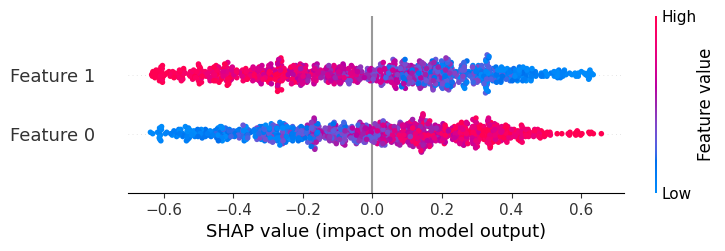

Plot for class 1


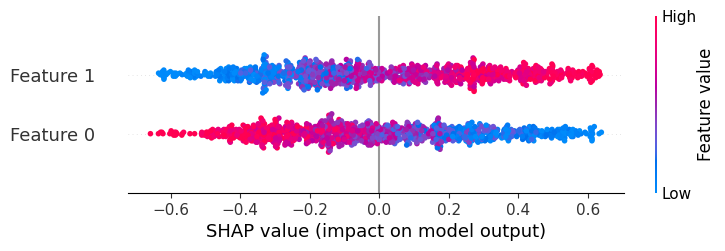

Plot for class 0


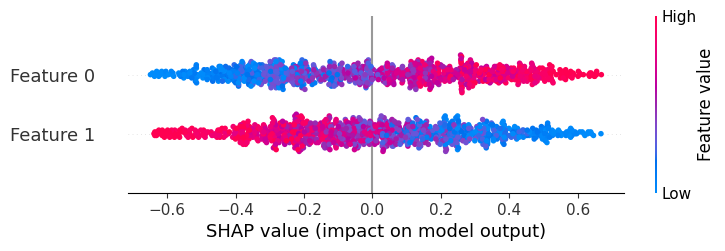

Plot for class 1


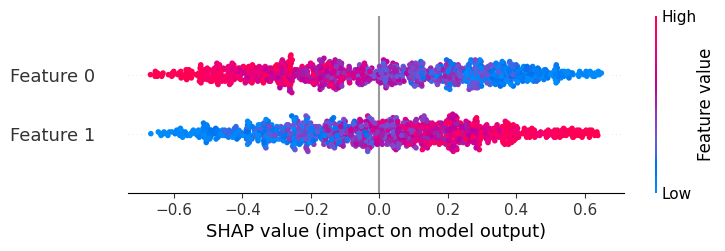

Plot for class 0


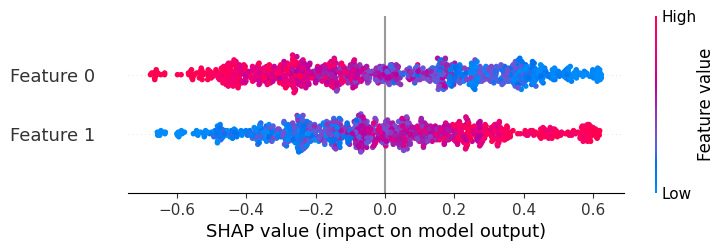

Plot for class 1


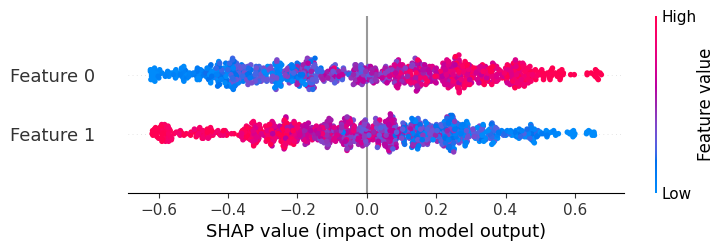

In [ ]:
for explanation in explanations:
  print("==============================================================================================")
  #print(len(explanation))
  #print(explanation[0])
  for i in (0,1):
    print("Plot for class " + str(i))
    shap.plots.beeswarm(explanation[:,:,i])
    #shap.plots.beeswarm(explanation[:,:,i], color="Blue")

In [ ]:
explainer = explanations[0]
print(len(explainer))
print(explainer[0])

1000
.values =
array([[-0.16801924,  0.16801924],
       [-0.32980933,  0.32980933]])

.base_values =
array([0.49782857, 0.50217143])

.data =
array([ 6.72176797, -8.272219  ])
